In [ ]:
import pandas as pd
import re
from nltk.stem import SnowballStemmer
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('popular')

In [3]:
link = r"C:\Users\josse\OneDrive\Documents\GitHub\checkpoint_4\checkpoint 4\csv\date.csv"
df = pd.read_csv(link)

In [4]:
def description (dataframe):
    text_full = ''
    for item in dataframe['description']:
        text_full+= item
    return text_full


In [11]:
def cloud (dataframe):
    op_text_all_wine =  re.sub(r'[^\w\s]','',description(dataframe))

    tokens = nltk.word_tokenize(op_text_all_wine.lower())
    list_clean = []
    for words in tokens:
         if words not in nltk.corpus.stopwords.words("english"):
            list_clean.append(words)

    stem_en = SnowballStemmer("english")
    sent_stem  = [stem_en.stem(word) for word in list_clean]
    freq_dict = nltk.FreqDist(sent_stem)

    wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)

    wordcloud.generate_from_frequencies(freq_dict)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

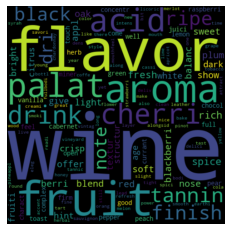

In [12]:
cloud(df)

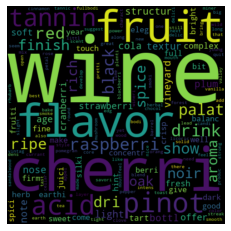

In [20]:
df_pinot = df[df['variety']=='Pinot Noir']
cloud(df_pinot)

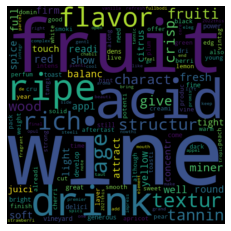

In [21]:
df_province = df[df['province']=='Burgundy']
cloud(df_province)